In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
np.set_printoptions(precision=4)

In [2]:
import numpy as np
x = np.fromstring('1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20', dtype=float, sep='\t')
d = np.fromstring('-1.69	-0.79	5.77	7.80	4.56	14.32	15.47	8.88	7.41	17.26	14.83	20.47	20.39	27.04	22.53	22.36	29.35	22.86	31.22	28.13', dtype=float, sep='\t')
a = np.polyfit(x,d,1)
a

array([ 1.57310526, -0.60910526])

Text(0.5, 1.0, 'Regresja liniowa punktów pomiarowych')

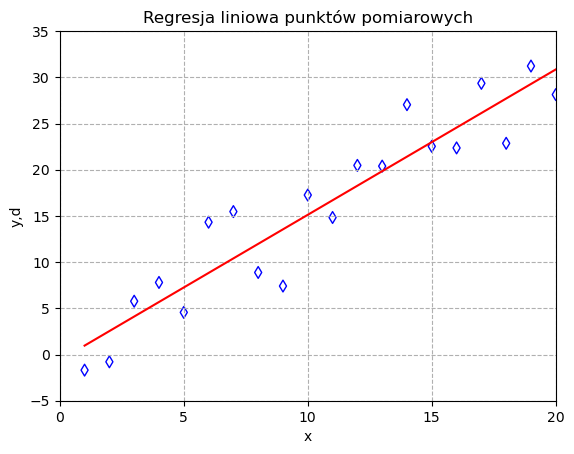

In [3]:
xd = np.linspace(min(x),max(x),100)
yd = np.polyval(a,xd)
plt.scatter(x,d,marker='d',facecolors='none', edgecolor='blue')
plt.plot(xd,yd, 'r')
plt.grid(linestyle='--' )
plt.xticks( range(0,21,5) );
plt.ylabel('y,d')
plt.xlabel('x')
plt.xlim(0,20)
plt.ylim(-5,35)
plt.title('Regresja liniowa punktów pomiarowych')

Text(0.5, 1.0, 'Wykres błędów regresji liniowej ')

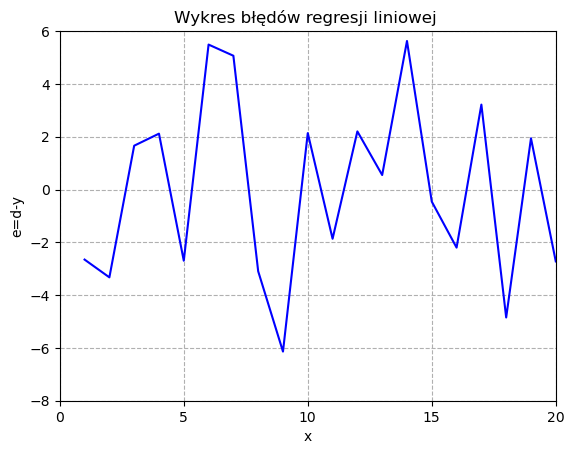

In [4]:
plt.plot(x,d-np.polyval(a,x), 'b')
plt.grid(linestyle='--' )
plt.xticks( range(0,21,5) );
plt.ylabel(r'e=d-y')
plt.xlabel('x')
plt.xlim(0,20)
plt.ylim(-8,6)
plt.title('Wykres błędów regresji liniowej ')

## 2.3 Zastosowanie dekompozycji SVD w regresji liniowej

In [6]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8]).reshape(3,3)
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

In [18]:
#help(svd)

In [17]:
from numpy.linalg import svd
U,S,V = svd(X)
print(f'U={U}')
print(f'S={S}')
print(f'V={V.T}')

U=[[-0.22   -0.778  -0.5884]
 [-0.5368 -0.4071  0.739 ]
 [-0.8145  0.4784 -0.3281]]
S=[16.3137  1.3584  0.1354]
V=[[-0.4946  0.6937  0.5236]
 [-0.5909  0.1734 -0.7879]
 [-0.6373 -0.6991  0.3242]]


In [22]:
np.linalg.norm(X,2)

16.31368815555517

In [23]:
#help(np.linalg.norm)

In [24]:
np.linalg.cond(X)

120.50662309164444

In [31]:
A=np.mat("3 0 2 3; 4 1 2 2; 1 0 1 6; 5 0 4 1; 4 0 2 1; 2 2 3 1")
b=np.mat("1 0 0 2 3 5").T

In [35]:
W = np.linalg.pinv(A)

In [37]:
m = W@A
print(m)

[[ 1.0000e+00 -3.3307e-16 -5.5511e-16 -1.1102e-16]
 [-4.9960e-16  1.0000e+00  3.3307e-16 -3.3307e-16]
 [-2.2204e-16  0.0000e+00  1.0000e+00 -5.5511e-17]
 [-1.1102e-16  1.2837e-16  0.0000e+00  1.0000e+00]]


In [38]:
m = A@W
print(m)

[[ 0.2262  0.0969  0.2998  0.2226  0.1544 -0.0485]
 [ 0.0969  0.7558 -0.0144 -0.1903  0.3519  0.1221]
 [ 0.2998 -0.0144  0.8815 -0.07   -0.0969  0.0072]
 [ 0.2226 -0.1903 -0.07    0.8223  0.2154  0.0952]
 [ 0.1544  0.3519 -0.0969  0.2154  0.3752 -0.1759]
 [-0.0485  0.1221  0.0072  0.0952 -0.1759  0.939 ]]


In [41]:
a = np.linalg.pinv(A) @b
print(a)

[[-0.3878]
 [ 0.7145]
 [ 1.2729]
 [-0.1634]]


In [42]:
np.linalg.norm(b - A@a)

2.844567091660646